# Imports

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data 

In [2]:
year_2000 = pd.read_csv("Data/final_tmdb_data_2000.csv.gz")
year_2001 = pd.read_csv("Data/final_tmdb_data_2001.csv.gz")

## Join Data

In [3]:
# Combine both years 2001 & 2000 dataframes
tmdb_results_combined = year_2000.append(year_2001)

C:\Users\Justice\AppData\Local\Temp\ipykernel_44152\2719508761.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmdb_results_combined = year_2000.append(year_2001)


# EDA

## View Data

In [4]:
tmdb_results_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2725 entries, 0 to 1404
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2725 non-null   object 
 1   adult                  2723 non-null   float64
 2   backdrop_path          1469 non-null   object 
 3   belongs_to_collection  213 non-null    object 
 4   budget                 2723 non-null   float64
 5   genres                 2723 non-null   object 
 6   homepage               185 non-null    object 
 7   id                     2723 non-null   float64
 8   original_language      2723 non-null   object 
 9   original_title         2723 non-null   object 
 10  overview               2677 non-null   object 
 11  popularity             2723 non-null   float64
 12  poster_path            2445 non-null   object 
 13  production_companies   2723 non-null   object 
 14  production_countries   2723 non-null   object 
 15  rele

In [5]:
tmdb_results_combined.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,...,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.50,22.0,PG-13
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,...,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.45,10.0,PG-13
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,...,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.00,1.0,PG-13
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,...,14204632.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.11,2268.0,PG-13


## How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [6]:
# Check how many movies had values over 0 for budget
budget_over_0 = tmdb_results_combined['budget'] > 0
budget_total = budget_over_0.sum()
budget_total

552

In [7]:
# Check how many movies had values over 0 for revenue
rev_over_0 = tmdb_results_combined['revenue'] > 0
rev_total = rev_over_0.sum()
rev_total

459

In [8]:
print(f"{rev_total + budget_total} movies had at least some valid financial information.")

1011 movies had at least some valid financial information.


## How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [9]:
tmdb_results_combined['certification'].value_counts()

PG-13    2723
Name: certification, dtype: int64

Text(0.5, 0, 'Certification')

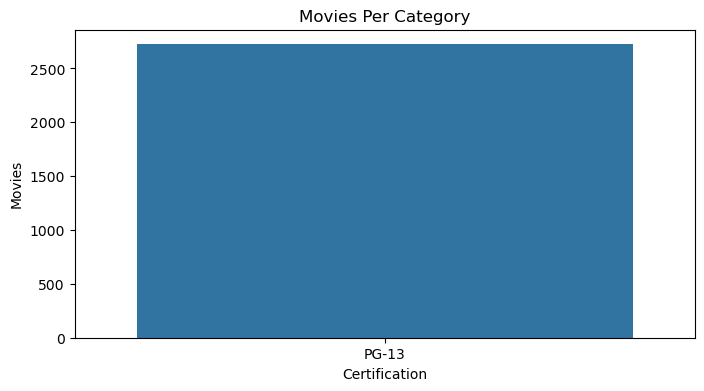

In [10]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=tmdb_results_combined, x='certification')
plt.title('Movies Per Category')
plt.ylabel('Movies')
plt.xlabel('Certification')


## What is the average revenue per certification category?

In [27]:
avg_rev = tmdb_results_combined.groupby('certification')['revenue'].mean()
avg_rev = round(avg_rev)
avg_rev

certification
PG-13    10345300.0
Name: revenue, dtype: float64

Text(0.5, 0, 'Average Revenue($)')

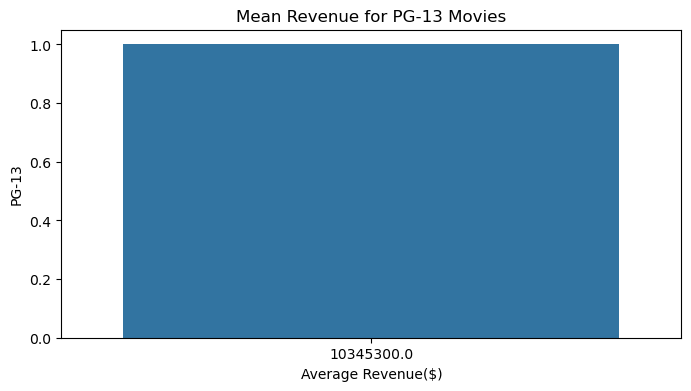

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=avg_rev, x= avg_rev)
plt.title('Mean Revenue for PG-13 Movies')
plt.ylabel('PG-13')
plt.xlabel('Average Revenue($)')


## What is the average budget per certification category?

In [30]:
avg_bug = tmdb_results_combined.groupby('certification')['budget'].mean()
avg_bug = round(avg_bug)
avg_bug

certification
PG-13    4917478.0
Name: budget, dtype: float64

Text(0.5, 0, 'Average Budget($)')

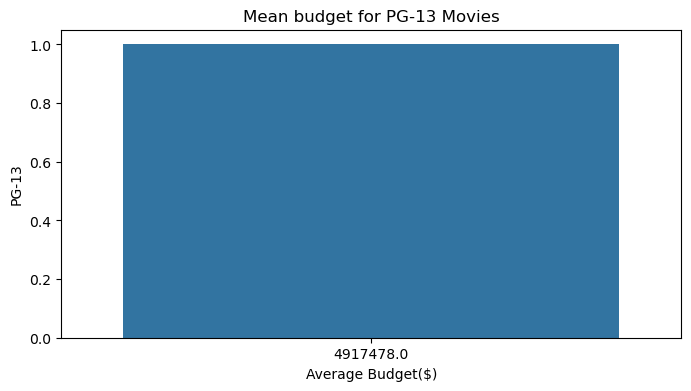

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(data=avg_bug, x= avg_bug)
plt.title('Mean budget for PG-13 Movies')
plt.ylabel('PG-13')
plt.xlabel('Average Budget($)')

In [35]:
# Save a final merged .csv.gz of all of the tmdb api data
tmdb_results_combined.to_csv("Data/tmdb_results_combined.csv.gz", 
                                compression="gzip", 
                                index=False)